In [52]:
from prepare_data import prepare_data



data = prepare_data()

data = data.iloc[4500:] # Remove some data
data

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,...,Diff,Short_day_change,Mid_day_change,Long_day_change,t+1,t+2,t+4,t+5,t+3,Target
693,2021-05-10,99.22,99.26,98.84,99.34,98.10,99.34,98.825,2918512.0,2.884048e+08,...,0.92,0.188,0.1200,0.1724,97.56,96.76,98.76,98.90,99.70,0
692,2021-05-11,97.50,97.56,98.84,99.02,97.52,97.56,98.118,5113260.0,5.017266e+08,...,-1.78,0.172,0.0480,0.1708,96.76,99.70,98.90,97.64,98.76,1
691,2021-05-12,96.14,96.18,96.90,97.30,95.94,96.76,96.492,3670967.0,3.542064e+08,...,-0.80,-0.324,0.0330,0.1252,99.70,98.76,97.64,98.26,98.90,1
690,2021-05-14,99.78,99.82,98.10,100.20,97.34,99.70,98.940,6147501.0,6.082310e+08,...,2.94,0.228,0.2110,0.1768,98.76,98.90,98.26,98.62,97.64,0
689,2021-05-17,98.94,98.98,99.64,99.70,97.88,98.76,98.538,4034215.0,3.974850e+08,...,-0.94,0.068,0.0860,0.1340,98.90,97.64,98.62,98.20,98.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2024-01-22,110.25,110.30,108.60,110.70,108.45,110.10,109.982,5093649.0,5.590668e+08,...,2.25,-0.060,0.0975,0.2860,109.65,110.80,114.40,113.30,115.60,1
8,2024-01-23,109.65,109.70,110.35,110.55,109.15,109.65,109.678,4554096.0,4.994752e+08,...,-0.45,0.480,0.1100,0.2742,110.80,115.60,113.30,113.65,114.40,1
7,2024-01-24,110.90,110.95,110.55,111.30,109.30,110.80,110.468,4824577.0,5.330055e+08,...,1.15,0.650,0.1325,0.2940,115.60,114.40,113.65,112.55,113.30,1
6,2024-01-25,115.40,115.45,110.40,115.60,110.15,115.60,113.894,8443112.0,9.618429e+08,...,4.80,1.540,0.3025,0.3760,114.40,113.30,112.55,111.35,113.65,0


## Visualize

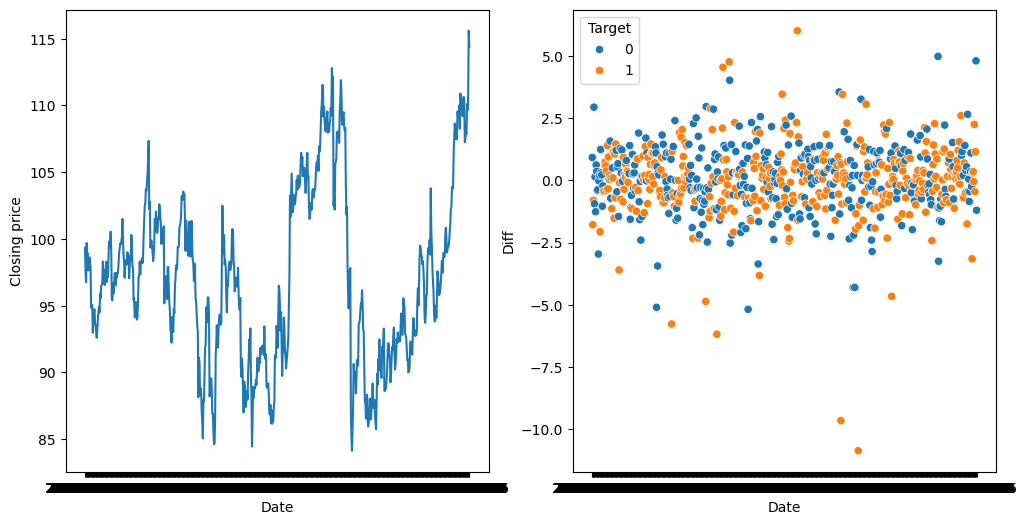

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  

sns.lineplot(data=data, x="Date", y="Closing price", ax=ax1)
sns.scatterplot(data=data, x="Date", y="Diff", hue="Target", ax=ax2)

plt.show()

## Scale data


In [54]:
from sklearn.preprocessing import StandardScaler

X = data[["Diff", "Short_day_change", "Mid_day_change", "Long_day_change"]].values

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X=X)

X_scaled

array([[ 0.61061665,  0.2585508 ,  0.34020725,  0.96362812],
       [-1.22775551,  0.23387618,  0.09558112,  0.95390971],
       [-0.5604945 , -0.53103703,  0.04461734,  0.67693508],
       ...,
       [ 0.76721873,  0.97103043,  0.38267706,  1.70222713],
       [ 3.25242554,  2.34355614,  0.96026653,  2.20029555],
       [-0.83284593,  1.98885849,  0.84135105,  1.96948336]])

## Clustering

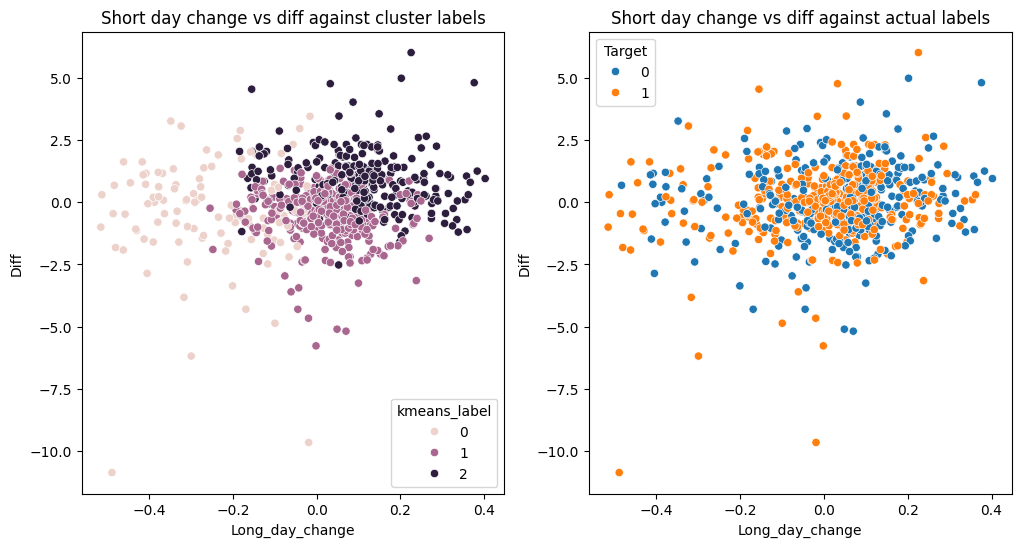

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

pred = kmeans.fit_predict(X=X_scaled)
data["kmeans_label"] = pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  
sns.scatterplot(data=data, x="Long_day_change", y="Diff", hue="kmeans_label", ax=ax1)
ax1.set_title("Short day change vs diff against cluster labels")


sns.scatterplot(data=data, x="Long_day_change", y="Diff", hue="Target", ax=ax2)
ax2.set_title("Short day change vs diff against actual labels")

plt.show()